## Written by Qiuyao Liu - ql459

## NYU CUSP PUI

## Assignment 1 Homework 4

 This is a skeleton & instruction notebook

-  GENERATE  100 samples of different sizes N (N>10 & N<2000) from each of 5 different distributions (500 samples in total), 
 _all with the same population mean_. Include a _Normal_, a _Poisson_, a _Binomial_, a _Chi-Squared_ distribution, and 1 more of your choice.                                       
-  For each sample plot the sample mean (dependent var.) against the sample size N (independent var.) (if you want you can do it with the sample standard deviation as well). 
-  Describe the behavior you see in the plots in terms of the law of large numbers.
- PLOT the distributions of all sample means (together for all distributions). _Mandatory_: as a histogram. _Optional_: in any other way you think is convincing
- Extra Credit: FIT a gaussian to the distribution of means            

In [2]:
from __future__ import print_function
__author__= 'fbb'

import pylab as pl
import seaborn
from scipy.optimize import curve_fit, minimize
from scipy.stats import norm
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import numpy as np
    
%pylab inline

Populating the interactive namespace from numpy and matplotlib


/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/IPython/html.py:14: ShimWarning: The `IPython.html` package has been deprecated. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)
/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['norm']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


## choose which distributions to use 

In [3]:
distributions = ['chisq','normal','poisson','binomial','uniform']

In [4]:
#choose the mean to give
mymean = 100
mystd = 1
#md is an empty dict
md = {}
# mean is the dict using to collect all the means
mean = {}
#given seed and generate 100 smaples
np.random.seed(199)
mysize = (2000 / (np.array(range(1, 100)))).astype(int)
print(mysize, mysize.shape)

[2000 1000  666  500  400  333  285  250  222  200  181  166  153  142  133
  125  117  111  105  100   95   90   86   83   80   76   74   71   68   66
   64   62   60   58   57   55   54   52   51   50   48   47   46   45   44
   43   42   41   40   40   39   38   37   37   36   35   35   34   33   33
   32   32   31   31   30   30   29   29   28   28   28   27   27   27   26
   26   25   25   25   25   24   24   24   23   23   23   22   22   22   22
   21   21   21   21   21   20   20   20   20] (99,)


# Generating the Chi-Squared distribution

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


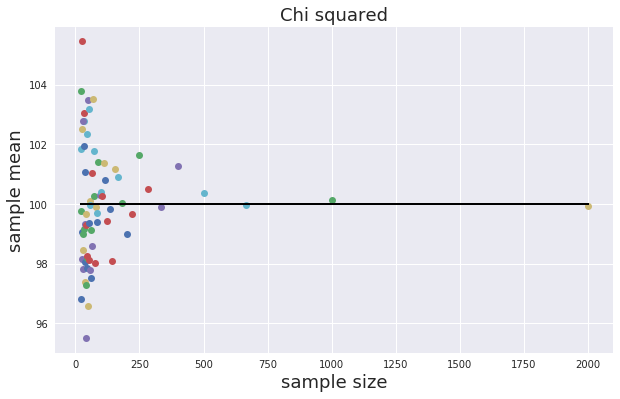

In [158]:
distribution = ['chisq']
md['chisq'] = {} 

for n in mysize:
    md['chisq'][n] = np.random.chisquare(mymean, size = n)
mean['chisq'] = {}  
axchisq_mu_n = pl.figure(figsize=(10,6)).add_subplot(111)

for nn in md['chisq']:
    if not type(nn) == str:
        mean['chisq'][nn] = md['chisq'][nn].mean()
        #plot
        axchisq_mu_n.plot(nn, mean['chisq'][nn], 'o')
        axchisq_mu_n.set_xlabel('sample size', fontsize=18)
        axchisq_mu_n.set_ylabel('sample mean', fontsize=18)
        axchisq_mu_n.set_title('Chi squared', fontsize=18)
        axchisq_mu_n.plot([min(mysize), max(mysize)], [mymean, mymean], 'k')

#### Figure 1a: Plot the sample mean against sample size (100) of the Chi squared Distribution. The sample mean get closer to the population mean (100) as the sample size gets larger.

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


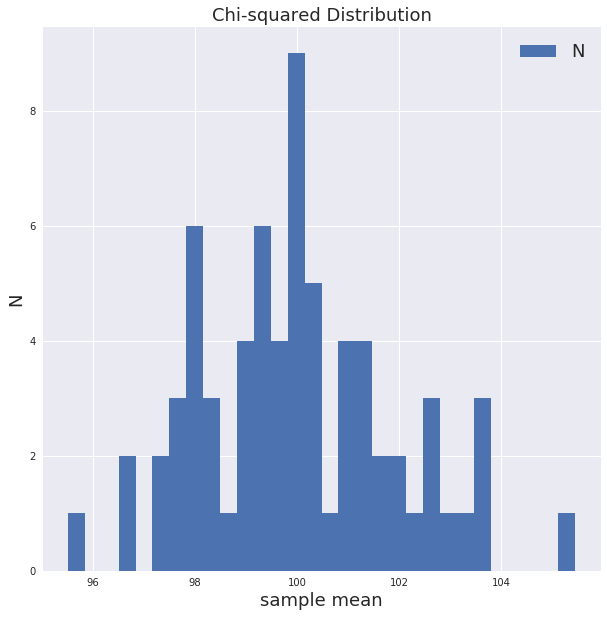

In [159]:
allmeans = list(mean['chisq'].values())

pl.figure(figsize=(10, 10))
pl.hist(allmeans,bins=30,label = 'N')
pl.xlabel('sample mean', fontsize = 18)
pl.ylabel('N', fontsize = 18)
pl.legend(loc="upper right", fontsize = 18)
pl.title('Chi-squared Distribution', fontsize = 18)
pl.show()

#### Figure 1b: The histogram shows that the most frequent sample means are mainly close to the degree of freedom, where sample mean is 100.

# Generating the normal distribution

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


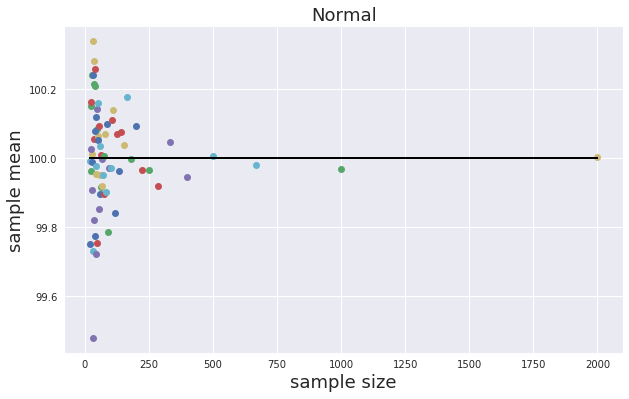

In [160]:
distribution = ['normal']
md['normal'] = {}
for n in mysize:
    md['normal'][n] = np.random.normal(mymean,mystd,n)
mean['normal'] = {}
axnormal_mu_n = pl.figure(figsize=(10,6)).add_subplot(111)

for nn in md['normal']:
    if not type(nn) == str:
        mean['normal'][nn] = md['normal'][nn].mean()
        axnormal_mu_n.plot(nn,mean['normal'][nn],'o')
        axnormal_mu_n.set_xlabel('sample size',fontsize=18)
        axnormal_mu_n.set_ylabel('sample mean',fontsize=18)
        axnormal_mu_n.set_title('Normal',fontsize=18)
        axnormal_mu_n.plot([min(mysize), max(mysize)],[mymean, mymean],'k')

#### Figure 2a: Plot the sample mean against sample size (100) of the Normal Distribution. The sample mean get closer to the population mean (100) as the sample size gets larger.

Text(0.5,1,'Normal Distribution')

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


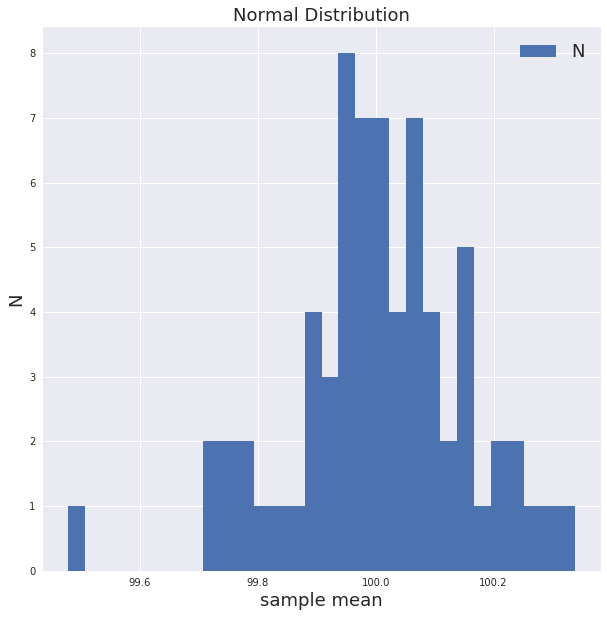

In [161]:
allmeans = list(mean['normal'].values())

pl.figure(figsize=(10, 10))
pl.hist(allmeans,bins=30,label='N')
pl.xlabel('sample mean', fontsize = 18)
pl.ylabel('N', fontsize = 18)
pl.legend(loc='upper right',fontsize = 18)
pl.title('Normal Distribution', fontsize=18)

#### Figure 2b: The normal distribution histogram shows that the most frequent sample mean are mainly around to the population mean, 100.

# Generating the Poisson distribution

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


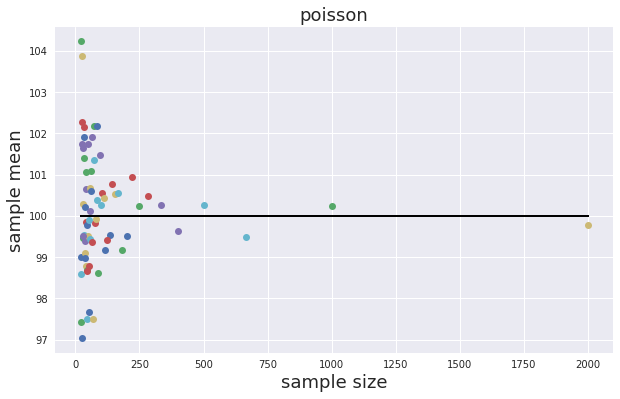

In [162]:
md['poisson'] = {}
for n in mysize:
    md['poisson'][n] = np.random.poisson(mymean,size = n)

mean['poisson'] = {}
#md['poisson']['means']={}
#for n in mysize:
#    md['normal']['means'][nn] = md['normal'][nn].mean()
axnormal_mu_n = pl.figure(figsize=(10,6)).add_subplot(111)

for nn in md['poisson']:
    if not type(nn) == str:
        mean['poisson'][nn] = md['poisson'][nn].mean()
        axnormal_mu_n.plot(nn,mean['poisson'][nn],'o')
        axnormal_mu_n.set_xlabel('sample size',fontsize = 18)
        axnormal_mu_n.set_ylabel('sample mean',fontsize = 18)
        axnormal_mu_n.set_title('poisson',fontsize = 18)
        axnormal_mu_n.plot([min(mysize), max(mysize)],[mymean, mymean],'k')

#### Figure 3a: Plot the sample mean against sample size (100) of the Poisson Distribution. The sample mean get closer to the population mean (100) as the sample size gets larger.

Text(0.5,1,'Poisson Distribution')

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


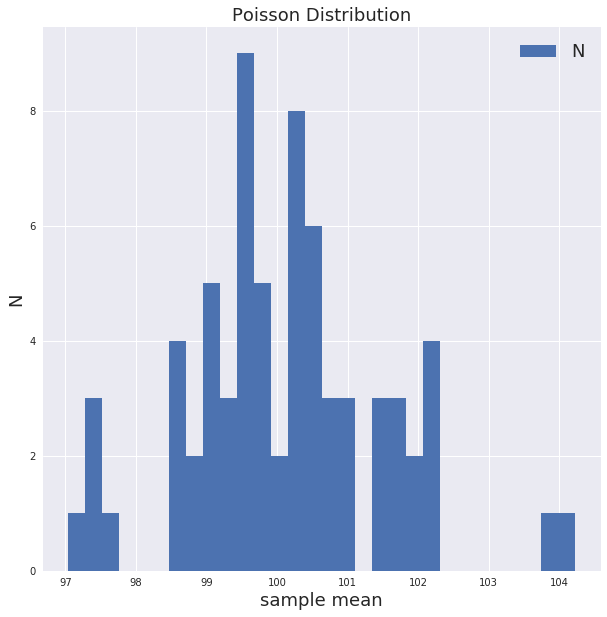

In [163]:
allmeans = list(mean['poisson'].values())

pl.figure(figsize=(10, 10))
pl.hist(allmeans,bins=30, label='N')
pl.xlabel('sample mean', fontsize = 18)
pl.ylabel('N', fontsize = 18)
pl.legend(loc='upper right',fontsize = 18)
pl.title('Poisson Distribution', fontsize=18)

#### Figure 3b: The poisson distribution histogram shows that the most frequent sample means are mainly close to the degree of freedom, where sample mean is 100.

# Generating the Binomial distribution

In [164]:
#md['binomial'] = np.random.binomial(mymean,0.5,n)
#pl.hist(md['binomial'], bins=30)
#pl.ylabel('N')
#pl.xlabel('x')
#pl.title('Binomial Distribution')

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


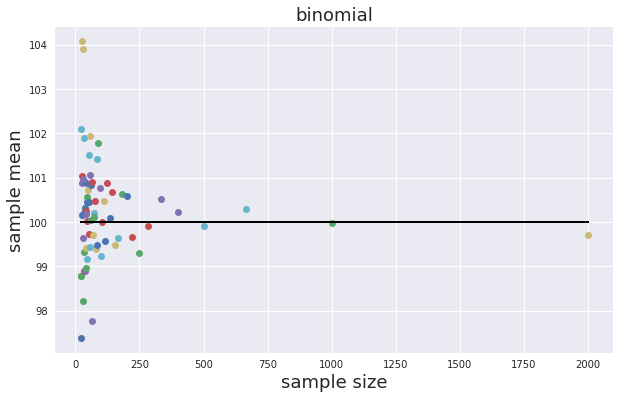

In [165]:
md['binomial'] = {}
for n in mysize:
    md['binomial'][n] = np.random.binomial(mymean/0.5,0.5,size = n)

mean['binomial'] = {}
#md['binomial']['means']={}
#for n in mysize:
#    md['normal']['means'][nn] = md['normal'][nn].mean()
axnormal_mu_n = pl.figure(figsize=(10,6)).add_subplot(111)

for nn in md['binomial']:
    if not type(nn) == str:
        mean['binomial'][nn] = md['binomial'][nn].mean()
        axnormal_mu_n.plot(nn,mean['binomial'][nn],'o')
        axnormal_mu_n.set_xlabel('sample size', fontsize=18)
        axnormal_mu_n.set_ylabel('sample mean', fontsize=18)
        axnormal_mu_n.set_title('binomial',fontsize=18)
        axnormal_mu_n.plot([min(mysize), max(mysize)],[mymean, mymean],'k')

#### Figure 4a: Plot the sample mean against sample size (100) of the Binomial Distribution. The sample mean get closer to the population mean (100) as the sample size gets larger.

Text(0.5,1,'Binomial Distribution')

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


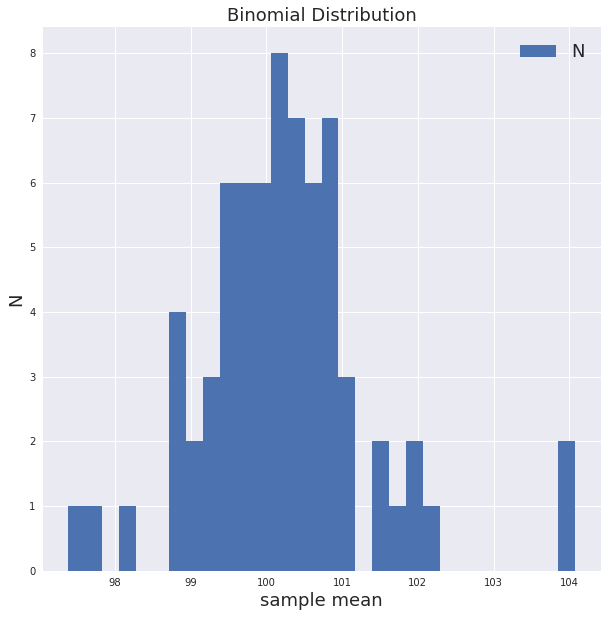

In [166]:
allmeans = list(mean['binomial'].values())

pl.figure(figsize=(10, 10))
pl.hist(allmeans,bins=30, label='N')
pl.xlabel('sample mean', fontsize = 18)
pl.ylabel('N', fontsize = 18)
pl.legend(loc='upper right',fontsize = 18)
pl.title('Binomial Distribution', fontsize=18)

#### Figure 4b: The binomial distribution histogram shows that the most frequent sample means are mainly close to the degree of freedom, where sample mean is 100.

# Generating the Uniform distribution

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


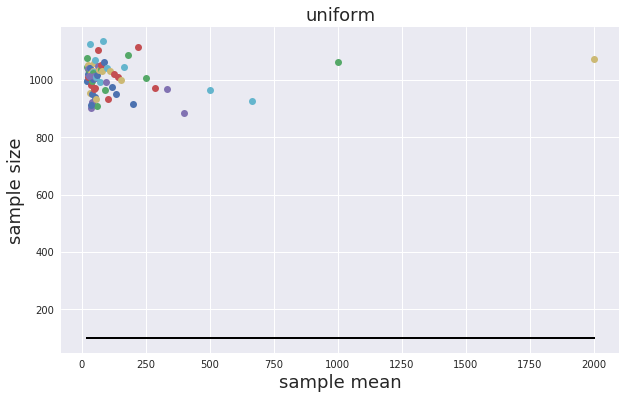

In [12]:
md['uniform'] = {}
for n in mysize:
    md['uniform'][n] = np.random.uniform(min(mysize),max(mysize),100)

mean['uniform'] = {}
axnormal_mu_n = pl.figure(figsize=(10,6)).add_subplot(111)

for nn in md['uniform']:
    if not type(nn) == str:
        mean['uniform'][nn] = md['uniform'][nn].mean()
        axnormal_mu_n.plot(nn,mean['uniform'][nn],'o')
        axnormal_mu_n.set_xlabel('sample mean', fontsize = 18)
        axnormal_mu_n.set_ylabel('sample size', fontsize = 18)
        axnormal_mu_n.set_title('uniform', fontsize = 18)
        axnormal_mu_n.plot([min(mysize), max(mysize)],[mymean, mymean],'k')

#### Figure 5a: Plot the sample mean against sample size (100) of the Uniform Distribution. The sample means generally equal to the population mean (100) for all the sample size.

Text(0.5,1,'Uniform Distribution')

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


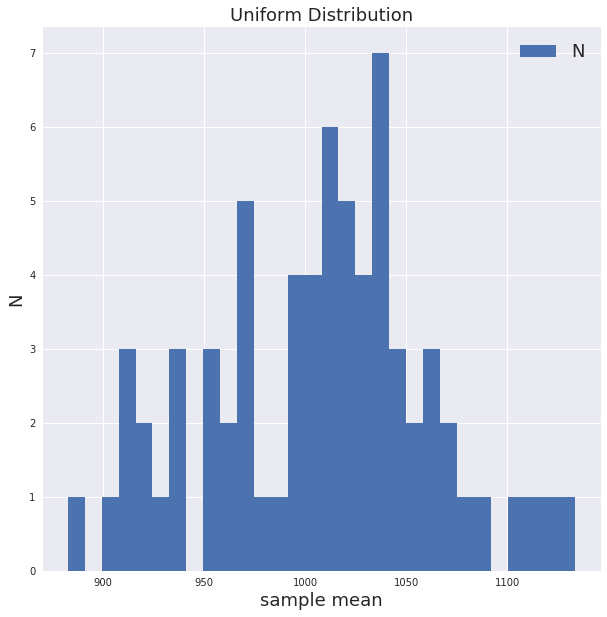

In [13]:
allmeans = list(mean['uniform'].values())

pl.figure(figsize=(10, 10))
pl.hist(allmeans,bins=30, label='N')
pl.xlabel('sample mean', fontsize = 18)
pl.ylabel('N', fontsize = 18)
pl.legend(loc='upper right',fontsize = 18)
pl.title('Uniform Distribution', fontsize=18)

#### Figure 5b: The uniform distribution histogram shows that all the sample means equal to 100, the population mean.

# Histogram for mean together 

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


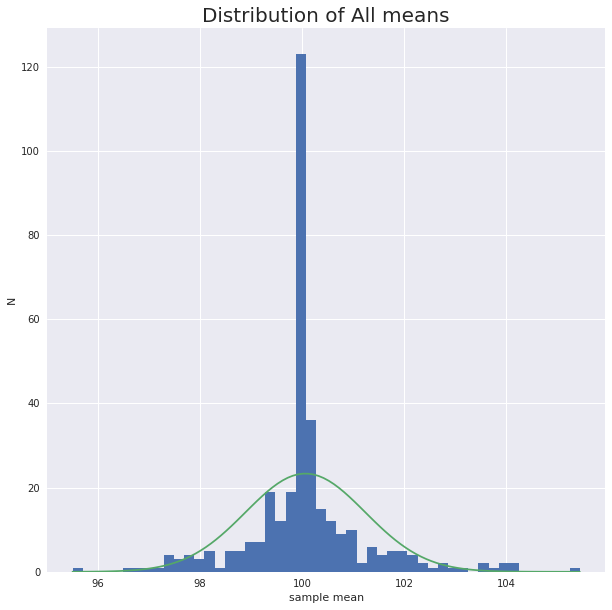

In [171]:
allmeans = []
for n in mean:
    for i in mean[n]:
        allmeans.append(mean[n][i])
pl.figure(figsize=(10,10))
p = pl.hist(allmeans,bins=50)
pl.xlabel('sample mean')
pl.ylabel('N')
pl.title('Distribution of All means', fontsize = 20)

gaus_mean = np.mean(allmeans)
gaus_var = np.var(allmeans)
sigma = np.sqrt(gaus_var)
x = np.linspace(min(allmeans), max(allmeans), 100)
dx = p[1][1] - p[1][0]
scale = len(allmeans) * dx
plt.plot(x, mlab.normpdf(x, gaus_mean, sigma) * scale)
plt.show()

#### Figure 6: Fit the gaussion distribution of the sample means